__________________________________________________________________________________
                             |Predicting BTC with LSTM|
                                   |Vanilla LSTM|
                                   
Gabriel Lyra      - glgs2  
Guilherme Melo    - gacm  
Henrique Mariz    - ham2  
Matheus Belfort   - mbmt  
Matheus Lima      - mlbp  
__________________________________________________________________________________

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Carregando dataset

In [2]:
file = 'btc.csv'

In [3]:
btc = pd.read_csv(file)
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


Removendo colunas que não devem ser utilizadas no treinamento

In [4]:
btc = btc.drop(['Date', 'Symbol'], axis=1)

Separando entrada e saída

In [5]:
features = btc['Close']
outcome = btc.drop(['Close'], axis=1)

In [6]:
outcome

,Open,High,Low,Volume From,Volume To
0,7459.11,7640.46,7380.00,2722.80000,2.042265e+07
1,7584.15,7661.85,7326.94,8491.93000,6.342069e+07
2,7505.00,7734.99,7269.00,11033.72000,8.293137e+07
3,7987.70,8030.00,7433.19,14905.99000,1.148104e+08
4,8393.44,8400.00,7950.00,6589.43000,5.389753e+07
...,...,...,...,...,...
1268,377.10,377.10,377.10,0.00000,0.000000e+00
1269,378.00,378.00,377.10,0.01000,3.770000e+00
1270,378.00,378.00,377.01,0.54660,2.065200e+02
1271,370.00,378.00,370.00,15.01000,5.675070e+03


Invertendo dados

In [7]:
features = pd.DataFrame(features)
features_flipped = features["Close"].values[::-1]
features_flipped = pd.DataFrame(features_flipped)
features_flipped

,0
0,370.00
1,378.00
2,378.00
3,377.10
4,377.10
...,...
1268,7987.70
1269,7505.00
1270,7584.15
1271,7459.11


In [8]:
outcome_flipped = outcome.values[::-1]
outcome_flipped = pd.DataFrame(outcome_flipped)
outcome_flipped

,0,1,2,3,4
0,300.00,370.00,300.00,0.05656,1.953000e+01
1,370.00,378.00,370.00,15.01000,5.675070e+03
2,378.00,378.00,377.01,0.54660,2.065200e+02
3,378.00,378.00,377.10,0.01000,3.770000e+00
4,377.10,377.10,377.10,0.00000,0.000000e+00
...,...,...,...,...,...
1268,8393.44,8400.00,7950.00,6589.43000,5.389753e+07
1269,7987.70,8030.00,7433.19,14905.99000,1.148104e+08
1270,7505.00,7734.99,7269.00,11033.72000,8.293137e+07
1271,7584.15,7661.85,7326.94,8491.93000,6.342069e+07


Grafico do dataset completo

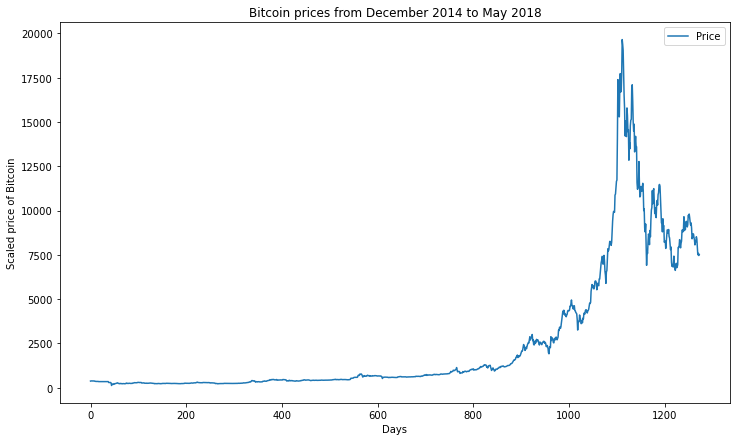

In [9]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(features_flipped, label='Price')
plt.legend()
plt.show()

Separando partes do dataset

In [10]:
outcome_train, outcome_test, features_train, features_test = train_test_split(outcome_flipped, features_flipped, test_size = 0.2, random_state = 0)

In [11]:
standard_scalar = StandardScaler()

outcome_train = pd.DataFrame(standard_scalar.fit_transform(outcome_train), columns = outcome_flipped.columns)
outcome_test = pd.DataFrame(standard_scalar.transform(outcome_test), columns = outcome_flipped.columns)

In [12]:
outcome_train
outcome_test

,0,1,2,3,4
0,2.345303,2.228387,2.246524,1.782820,2.519336
1,2.097467,2.176389,2.236300,0.366523,1.028112
2,-0.555609,-0.552482,-0.560071,-0.208889,-0.391273
3,-0.565679,-0.562248,-0.569980,-0.294743,-0.396923
4,-0.555283,-0.551495,-0.559503,0.125895,-0.378713
...,...,...,...,...,...
250,-0.535570,-0.534751,-0.538635,-0.420082,-0.394559
251,2.415630,2.663828,2.601143,0.795105,1.775481
252,-0.594497,-0.591772,-0.602248,-0.367364,-0.406646
253,-0.544553,-0.543553,-0.547649,-0.479438,-0.398969


__________________________________________________________________________________

                               |Vanilla LSTM|
__________________________________________________________________________________

In [13]:
close_price = np.array(features_flipped).reshape(-1,1)
standard_scalar = StandardScaler()

close_priceSC = standard_scalar.fit_transform(close_price)
stepsize = 3

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

(1270, 3) (1270,)


In [14]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.fit(X_train, y_train, epochs = 100, batch_size=128)

Epoch 1/100
8/8 [==============================] - 30s 3ms/step - loss: 0.2570
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1873
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1599
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1309
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 8.3361e-04
Epoch 13/100
8/8 [==============================] - 0s 3

____________________________________________________  

modelo com 3 datas de entrada  
ativação = relu  
otimização = adam  
batchsize = 128  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

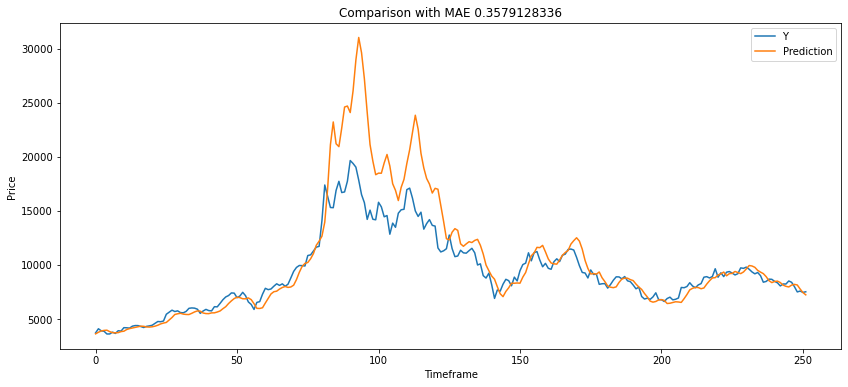

In [16]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [17]:
stepsize = 32

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size=32)

(1241, 32) (1241,)
Epoch 1/100
32/32 [==============================] - 3s 9ms/step - loss: 0.2370
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 8.9411e-04
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 7.1197e-04
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 9.2653e-04
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 7.8114e-04
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 7.1925e-04
Epoch 11/100
32/32 [==============================] - 0s 8ms/step - loss: 7.2610e-04
Epoch 12/100
32/32 [==============================] - 0s 10ms/step - loss: 

____________________________________________________  

modelo com 32 datas de entrada  
ativação = relu  
otimização = adam  
batchsize = 32  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

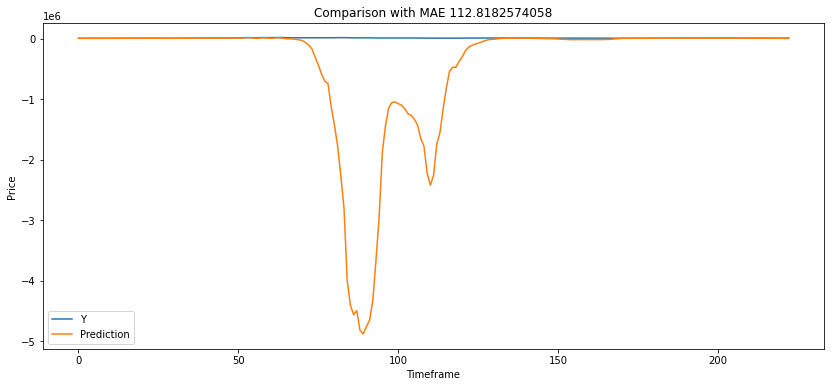

In [18]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [19]:
stepsize = 3

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size=32)

(1270, 3) (1270,)
Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 0.1813
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 8.0068e-04
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6678e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5785e-04
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0503e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4621e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8246e-04
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7293e-04
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7721e-04
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - 

____________________________________________________  

modelo com 3 datas de entrada  
ativação = relu  
otimização = adam  
batchsize = 32  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

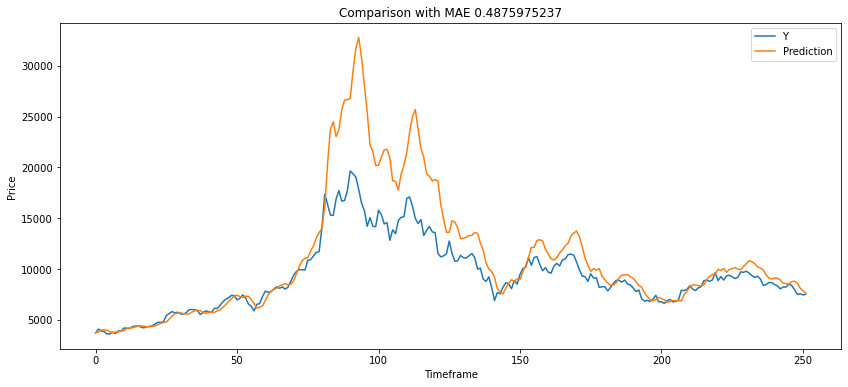

In [20]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [21]:
stepsize = 3

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size=256)

(1270, 3) (1270,)
Epoch 1/100
4/4 [==============================] - 3s 4ms/step - loss: 0.2493
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2213
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2044
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1877
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1679
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1550
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1401
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1259
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1104
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0967
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0824
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 13/100
4/4 [=========================

4/4 [==============================] - 0s 7ms/step - loss: 3.5213e-04


____________________________________________________  

modelo com 3 datas de entrada  
ativação = relu  
otimização = adam  
batchsize = 256  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

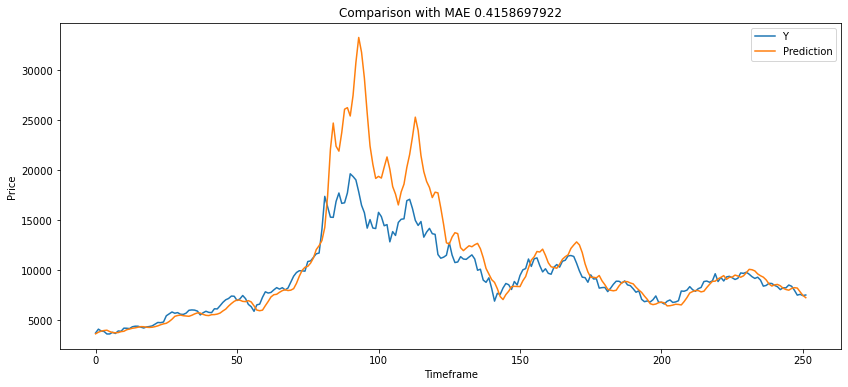

In [22]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [23]:
stepsize = 3

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size=128)

(1270, 3) (1270,)
Epoch 1/100
8/8 [==============================] - 2s 4ms/step - loss: 0.2282
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1655
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1251
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0990
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0786
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0709
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0580
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0587
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0506
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0511
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 13/100
8/8 [=========================

____________________________________________________  

modelo com 3 datas de entrada  
ativação = relu  
otimização = sgd  
batchsize = 128  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

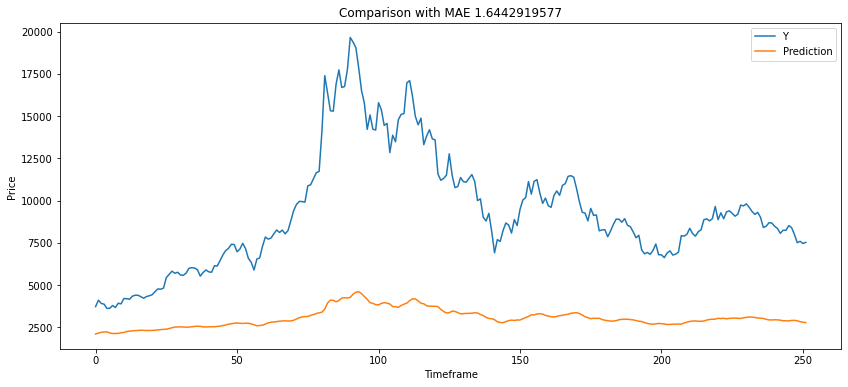

In [24]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [25]:
stepsize = 3

X = []
y = []
for i in range(stepsize, len(close_priceSC)):
    X.append(close_priceSC[i-stepsize:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train = X[:1018 ,:]
X_test = X[1018 :,:]

y_train = y[:1018 ]
y_test = y[1018 :]

X_train = X_train.reshape(-1,stepsize,1)
X_test = X_test.reshape(-1,stepsize,1)

model = Sequential()
model.add(LSTM(50, input_shape=(stepsize, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size=128)

(1270, 3) (1270,)
Epoch 1/100
8/8 [==============================] - 3s 4ms/step - loss: 0.2227
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1473
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0848
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0404
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 13/100
8/8 [=========================

____________________________________________________  

modelo com 3 datas de entrada  
ativação = tahn  
otimização = adam  
batchsize = 128  
(todos os modelos foram treinados com 100 epocas)  
____________________________________________________

Text(0, 0.5, 'Price')

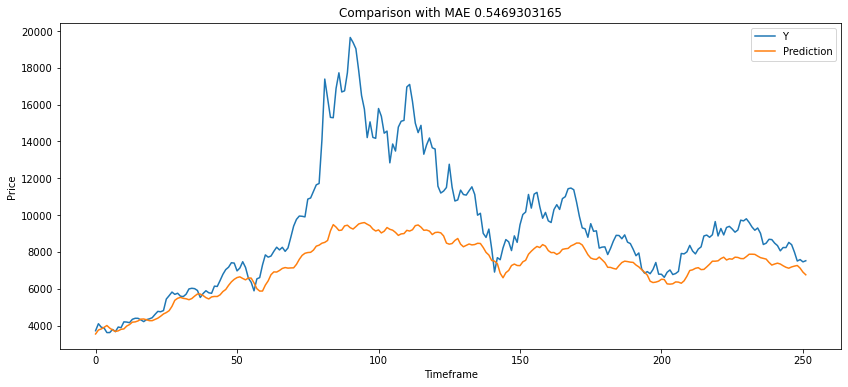

In [26]:
y_pred = model.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(14,6))
plt.plot(standard_scalar.inverse_transform(y_test.reshape(-1,1)))
plt.plot(standard_scalar.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")